# Math 134C Week 2

In [1]:
import math
# r is the risk-free rate, F is a cash flow, and dT is the time that we get each cash flow
def PV(F, dT, r):
    pv = 0
    if len(dT) != len(F):
        print("Input Error")
        return 0
    for n in range(0, len(F)):
        pv += F[n] * math.exp(-r * dT[n])
    return pv
        
# C_t is the price of call option, S_t is the current stock price, K is the strike, r is the risk-free rate, dt is time to expiration. D is the dividend of the stock, and dT is the time at which we receive the dividend. The delta is for the continuous dividend paying model. The function will return the price of the corresponding put option. 
def put_given_call(C_t, S_t, K, r, dt, D= None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return C_t - (S_t - PV(D, dT, r)) * math.exp(-delta * dt) + K * math.exp(-r * dt)

def call_given_put(P_t, S_t, K, r, dt, D = None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return P_t + (S_t - PV(D, dT, r)) * math.exp(-delta * dt) - K * math.exp(-r * dt)

def B(r, dt, u, d, Vu, Vd):
    return math.exp(-r * dt)*(u * Vd - d * Vu)/(u-d)

## How does strike price influence the price of options
We consider the option on a non-dividend paying stock for simplicity. 
For two options with the same expiry date but different strike price $K_1 \leq K_2$, we have 
$$C_t(K_1)\geq C_t(K_2)$$ 
$$P_t(K_1)\leq P_t(K_2)$$
Moreover, the difference between the price of those two options should be less than or equal to the difference of their strike price. we have 
$$C_t(K_1) - C_t(K_2)\leq K_2-K_1$$
$$P_t(K_2) - P_t(K_1)\leq K_2-K_1$$

## Arbitrage opportunity for mispriced options
**Exercise 9.8:** Consider the call and put prices are given by 

| Strike    | 50        | 55 |
|-----------|-----------| --- |
| Call premium | 9 | 10 | 
| Put premium| 7 | 6 |

What no-arbitrage property is violated? What spread position would you use to effect arbitrage? Demonstrate that the spread position is an arbitrage.

**Solution:**
It violated the inequality in the above notes. 
We can long a 50-strike call and short a 55-strike call. We get an instant profit of 1 dollar. At expiry, we get a payoff of $(S_T-50)^+-(S_T-55)^+ \geq 0$. Hence, we get arbitrage profit of at least 1 dollar.

Similarly, we can also long a 55-strike put and short a 50-strike put. By using the similar explanation as above, we get arbitrage profit of at least 1 dollar


**Exercise 9.9: Suppose call and put prices are given by**

| Strike    | 50 | 55 |
|-----------|----|----|
| Call premium | 16 | 10 | 
| Put premium| 7  | 14 |

What no-arbitrage property is violated? What spread position would you use to effect arbitrage? Demonstrate that the spread position is an arbitrage.

**Solution:**
It violated the inequality in the above notes. 
We can long a 55-strike call and short a 50-strike call. Our initial profit is 6. At expiry, our payoff is $(S_T-55)^+-(S_T-50)^+ \geq -5$. Our initial profit is greater than what we need to pay at the expiry, hence we get arbitrage profit for at least 1 dollar. 

Similarly, we can long a 50-strike put and sell a 55-strike put to exploit the arbitrage opportunity. The analysis is similar as above.

**Quiz 1:**
Jafee Corp. common stock is priced at 36.50 per share. The company just paid its 0.50 quarterly dividend. The continuously compounded risk free annual interest rate is 6.0\%. A 35.00 strike European call, maturing in 6 months, sells for 3.20. What is the price of a 6-month, 35.00 strike put option?

In [17]:
p = put_given_call(C_t = 3.2, S_t = 36.5, K = 35, r = 0.06, dt = 0.5, D = [0.5,0.5], dT=[0.25, 0.5])
print(f"The price of this put option is {p:.2f}")

The price of this put option is 1.64


**Quiz 2:**
Rankin Corp. common stock is priced at 74.20 per share. The company just paid its 1.10 quarterly dividend. The continuously compounded risk free annual interest rate is 6.0\%. A European call option on Rankin Corp. with a strike price of 70.00, maturing in 6 months, sells for 6.50. How much arbitrage profit/loss is made by shorting a 70.00 strike price European put option on Rankin Corp., which is priced at 2.50?

In [18]:
correct_put_price = put_given_call(C_t = 6.5, S_t = 74.2, K = 70, r = 0.06, dt = 0.5, D = [1.1, 1.1], dT = [0.25, 0.5])
print(f"The arbitrage profit is {2.50-correct_put_price:.2f}")

The arbitrage profit is 0.12


**Quiz 3:**
The price of a stock is 52.00. What is the price difference between an at-the-money call option and an at-the-money put option on this stock? Assume 38 days to expiration, a 6.0\% annual continuously compounded risk free interest rate, and use continuous compounding of interest in all your calculations for this problem.

In [19]:
print(f"The difference between their price is {call_given_put(P_t = 0, S_t = 52, K = 52, r = 0.06, dt = 38/365):.2f}")

The difference between their price is 0.32


**Quiz 4:**
You are given the following:

• The current price to buy one share of XYZ stock is 500.
• The stock does not pay dividends.
• The annual continuously compounded risk-free interest rate is 6\%.
• A European call option on one share of XYZ stock with a strike price of K that expires in one year costs 66.59.
• A European put option on one share of XYZ stock with a strike price of K that expires in one year costs 18.64.

Using put-call parity, calculate the strike price, K.

In [20]:
print(f"The strike price is {(500 - 66.59 + 18.64) * math.exp(0.06):.2f}")

The strike price is 480.00


**Quiz 5:**

The PS index has the following characteristics:

- One share of the PS index currently sells for 1,000.
- The PS index does not pay dividends.
- Sam wants to lock in the ability to buy this index in one year for a price of 1,025. He can do this by buying or selling European put and call options with a strike price of 1,025.
- The continuously compounded risk free annual interest rate is 5.0\%.

Determine which of the following gives the strategy that will achieve Sam’s objective and also gives the cost today of establishing this position.

In [21]:
print(f"The cost today is {call_given_put(P_t = 0, S_t = 1000, K = 1025, r = 0.05, dt = 1):.2f}")

The cost today is 24.99


**Quiz 6:**
Stock XYZ has the following characteristics:
- The current price is 40.
- The price of a 35-strike 1-year European call option is 9.12
- The price of a 40-strike 1-year European call option is 6.22
- The price of a 45-strike 1-year European call option is 4.08
- The annual risk-free interest rate is 8%.

Use simple compounding of interest to compute the future value of option premiums when computing profits in this problem.  

Let S be the price of the stock one year from now. All call positions being compared are long.

Determine the range for S such that the 45-strike call produces a higher profit than the 40-strike call, but a lower profit than the 35-strike call.

**Quiz 7:**
Consider a European put option on a stock index without dividends, with 6 months to expiration and a strike price of 1,000.

Suppose that the six-month risk-free interest rate is 2\%, and that the put costs 74.20 today.

Use simple compounding of interest to compute the future value of option premiums when computing profits in this problem.  

Calculate the price that the index must be in 6 months so that being long the put option would produce the same profit as being short the put option.

In [22]:
print(f"The price of this index in 6 month should be", 1000 - 74.2 * 1.02)

The price of this index in 6 month should be 924.316


**Quiz 8:**
A trader shorts one share of a stock index for 50 and buys a 60-strike European call option on that stock index that expires in 2 years for 10.

Assume the annual risk-free continuously compounded interest rate is 3% and use continuous compounding of interest in all your calculations for this problem.

Assume that the continuously compounded interest rate you earn on the short sale proceeds, the short rebate rate, is equal to the risk-free rate.

The stock index increases to 75 after 2 years.

Calculate the profit on your combined position.

In [23]:
print(f"The profit of this position is {40 * math.exp(0.03 * 2) - 60:.2f}")

The profit of this position is -17.53


**Quiz 9:**
Jillo, Inc. stock is selling for 54.70 per share. Calls and puts with a 55 strike and 40 days until expiration are selling for 1.65 and 1.23, respectively.

Assume the annual risk-free continuously compounded interest rate is 10\% and use continuous compounding of interest in all your calculations for this problem.

What potential arbitrage profit exists?

In [24]:
print(f" The arbitrage profit is {1.65 - call_given_put(P_t = 1.23, S_t =54.7, K = 55, dt = 40/365, r= 0.1):.2f}")

 The arbitrage profit is 0.12


**Quiz 10:**
The price of a non-dividend paying stock is 55 per share. A 6-month, at the money call option is trading for 1.89.

Assume the annual risk-free continuously compounded interest rate is 6.5\% and use continuous compounding of interest in all your calculations for this problem.

Assuming there is no arbitrage, what is the price of a European put option with the same strike price and time to expiration?

# One Step Binomial Model for Option Pricing
Let $V_t$ to be the value of an investment instrument at time $t$ whose payoff at time $T$ only depends on the stock price. (For example, V could be a call option, put option, future, or other products). Let $S_t$ be the price of the stock at time $t$, $\delta$ be the continuous dividend yield, and $u, d$ be the number such that the stock will either go up to $Su$ or go down to $Sd$ at time $T$. Let $V_T^u$ be the value of the investment instrument at time $T$ when the stock goes to $Su$, and $V_T^d$ be the value when the stock goes to $Sd$ (If $V$ is a call option with strike $K$, then $V_T^u = (Su-K)^+, V_T^d = (Sd-K)^+$). Assume that the risk-free rate is $r$, and denote $T-t$ as $\Delta t$. Then we define the risk-neutral probability measure (also called price measure) 
$$q = \frac{e^{(r-\delta) \Delta t} - d}{u-d}$$
Then the price of $V$ at time $t$ is given by 
$$V_t = e^{-r\Delta t}(qV_T^u + (1-q)V_T^d)$$

**Self-financing Replicating Portfolio:**
We will construct a portfolio 
$$\Pi_t = \Delta S_t + B_t$$
consisting of $\Delta$ share of the stock, and $B_t$ amount of money in the bank. We wish to use this portfolio to replicate the payoff of a financial instrument $V_t$. Then we must have 
$$\Pi_T^u = \Delta S_tue^{\delta \Delta t} + B_te^{r \Delta t} = V_T^u$$
$$\Pi_T^d = \Delta S_tde^{\delta \Delta t} + B_te^{r \Delta t} = V_T^d$$
where $\delta$ is the continuous dividend. ($\Delta$ share of the stock grow to $\Delta e^{\delta \Delta t}$ share)
By solving the above equations, we get 
$$\Delta = e^{-\delta \Delta t}\frac{V_T^u-V_T^d}{S_t(u-d)}$$
$$B_t = e^{-r \Delta t} \frac{u V_T^d - dV_T^u}{u-d}$$
$$V_t = \Pi_t = e^{-\delta \Delta t}\frac{V_T^u-V_T^d}{u-d} +  e^{-r \Delta t} \frac{u V_T^d - dV_T^u}{u-d} = e^{-r\Delta t}(qV_T^u + (1-q)V_T^d)$$

In [2]:
def one_step_binomial(r, dt, u, d, Vu, Vd, delta = 0):
    q = (math.exp((r - delta) * dt) - d)/(u-d)
    if not (1 > q > 0): 
        print("Arbitrage opportunity exists")
        return -1
    return math.exp(-r * dt)*(q*Vu+(1-q)*Vd)    

def Delta(r, dt, u, d, Vu, Vd, S, delta = 0):
    return math.exp(-delta * dt)*(Vu-Vd)/(S*(u-d))

##### Example
Consider a European call option on the stock of XYZ, with a 40 strike and 1 year to expiration. XYZ does not pay dividends and its current price is 41. The continuously compounded risk-free interest rate is 8\%. Suppose that the stock price today is 41, and it will be either 60 or 30 in a year. We wish to determine the option price.


In [26]:
print(f"The price of this call option should be {one_step_binomial(r = 0.08, dt = 1, u = 60/41, d = 30/41, Vu = 20, Vd = 0):.3f}")

The price of this call option should be 8.871


**Exercise 10.1:**
Let S = 100, K = 105, r = 8\%, T = 0.5. Let u = 1.3, d = 0.8, $\delta = 0$, and n = 1 (one step binomial tree).
a. What are the premium, $\Delta$, and B for a European call?
b. What are the premium, $\Delta$, and B for a European put?

In [7]:
print(f"a) The price for the call option is {one_step_binomial(r = 0.08, u = 1.3, d= 0.8, Vu = 25, Vd = 0, dt = 0.5):.3f}")
print(f"   The Delta is {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 25, Vd = 0, S = 100):.2f}")
print(f"   The B is {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 25, Vd = 0):.2f}")
print(f"b) The price for the put option is {one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 0, Vd = 25, dt = 0.5):.3f}")
print(f"   The Delta is {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 0, Vd = 25, S = 100):.2f}")
print(f"   The B is {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 0, Vd = 25):.2f}")

a) The price for the call option is 11.568
   The Delta is 0.50
   The B is -38.43
b) The price for the put option is 12.451
   The Delta is -0.50
   The B is 62.45


**Exercise 10.2:**
Let S = 100,K = 95, r = 8\%, T = 0.5, and $\delta$ = 0. Let u = 1.3, d = 0.8, and n = 1.
a. Verify that the price of a European call is 16.196.
b. Suppose you observe a call price of 17. What is the arbitrage?
c. Suppose you observe a call price of 15.50. What is the arbitrage?

In [33]:
print(f"a) The price for the call option is {one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 35, Vd = 0, dt = 0.5):.3f}")
print(f"b) We can sell the call option, buy {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 35, Vd = 0, S = 100):.3f} share of stock, and borrow {-B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 35, Vd = 0):.3f} dollar from the bank")
print(f"b) We can buy the call option, short {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 35, Vd = 0, S = 100):.3f} share of stock, and save {-B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 35, Vd = 0):.3f} dollar to the bank")

a) The price for the call option is 16.196
b) We can sell the call option, buy 0.700 share of stock, and borrow 53.804 dollar from the bank
b) We can buy the call option, short 0.700 share of stock, and save 53.804 dollar to the bank


**Exercise 10.6:**
Let S = 100, K = 95, $\sigma$ = 30\%, r = 8\%, T = 1, and $\delta$ = 0. Let u = 1.3, d = 0.8, and n = 2. 
Construct the binomial tree for a call option. At each node provide the premium, $\Delta$, and B.

In [19]:
cu = one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 169 - 95, Vd = 104 - 95, dt = 0.5)
print(f"If the stock goes up in the first step, then the call option has price {cu:.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 130, Vu = 169 - 95, Vd = 104 - 95)}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu =169-95, Vd = 104-95):.3f}")
cd = one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 104 - 95, Vd = 0, dt = 0.5)
print(f"If the stock goes down in the first step, then the call option has price {cd:.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 80, Vu = 104-95, Vd = 0)}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 104-95, Vd = 0):.3f}")

print(f"In the current time, the call option has price {one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = cu, Vd = cd, dt = 0.5):.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 100, Vu = cu, Vd = cd):.3f}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = cu, Vd = cd):.3f}")

If the stock goes up in the first step, then the call option has price 38.725, Delta = 1.0, B = -91.275
If the stock goes down in the first step, then the call option has price 4.165, Delta = 0.225, B = -13.835
In the current time, the call option has price 19.994, Delta = 0.691, B = -49.127


**Exercise 10.10**:
Let S = 100, K = 95, $\sigma$ = 30, r = 8\%, T = 1, and $\delta$ = 0. Let u = 1.3, d = 0.8, and n = 2. 
Construct the binomial tree for an American put option. At each node provide the premium, $\Delta$, and B.

In [25]:
cu = one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 0, Vd = 0, dt = 0.5)
print(f"If the stock goes up in the first step, then the American put option has price {cu:.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 130, Vu = 0, Vd = 0)}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 0, Vd = 0):.3f}")
cd = one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = 0, Vd = 95-64, dt = 0.5)
print(f"If the stock goes down in the first step, then the American put option has price {cd:.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 80, Vu = 0, Vd = 95-64)}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = 0, Vd = 95-64):.3f}")
print(f"Note that we will choose not to exercise our right at this point")
print(f"In the current time, the call option has price {one_step_binomial(r = 0.08, u = 1.3, d = 0.8, Vu = cu, Vd = cd, dt = 0.5):.3f}, Delta = {Delta(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, S = 100, Vu = cu, Vd = cd):.3f}, B = {B(r = 0.08, dt = 0.5, u = 1.3, d = 0.8, Vu = cu, Vd = cd):.3f}")

If the stock goes up in the first step, then the American put option has price 0.000, Delta = 0.0, B = 0.000
If the stock goes down in the first step, then the American put option has price 15.440, Delta = -0.775, B = 77.440
Note that we will choose not to exercise our right at this point
In the current time, the call option has price 7.690, Delta = -0.309, B = 38.569


# Volatility
The (annual) volatility $\sigma$ is the standard deviation of continuous compounded return over a year, and we model the stock price by 
$$S^u = e^{(r-\delta)\Delta t + \sigma\sqrt{\Delta t}}$$
$$S^d = e^{(r-\delta)\Delta t - \sigma\sqrt{\Delta t}}$$

If $\sigma$ is the annual volatility, then the volatility in a period of $\Delta t$ is given by 
$$\sigma_{\Delta t} = \sigma\sqrt{\Delta t}$$

# Estimating the volatility using historical data

An estimate of the annual volatility of the whole time series is  0.5925634322616291


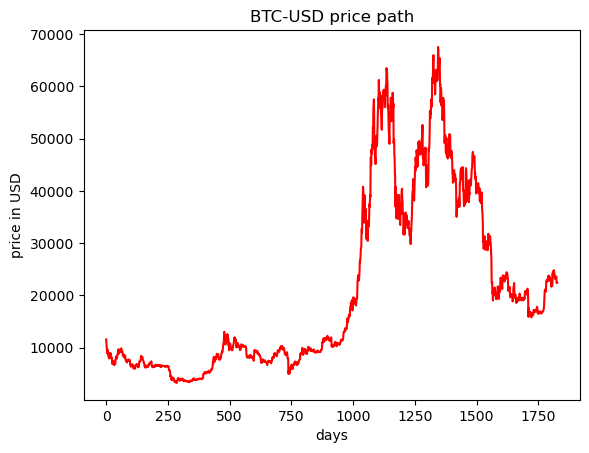

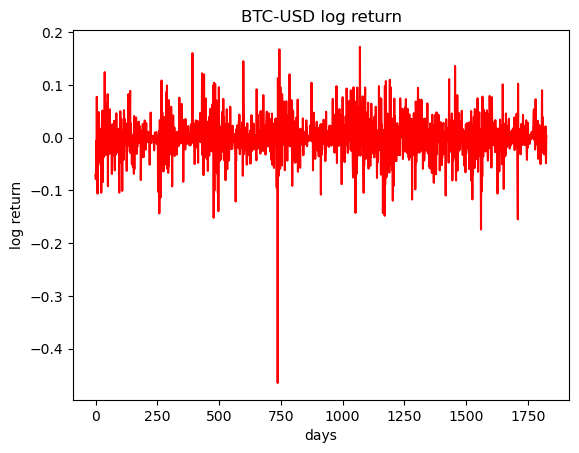

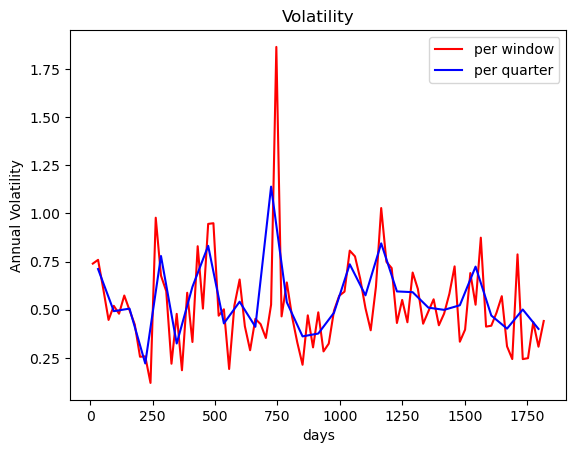

In [30]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("../data/Week_2_BTC_USD_2018_2023.txt")
days = np.arange(data.size)
log_return = np.empty(data.size-1, dtype = float)
#data_return = np.empty(data.size-1, dtype = float)
for i in range(0, data.size-1):
    log_return[i] = math.log(data[i+1])-math.log(data[i])
#    data_return[i] = (data[i+1]-data[i])/data[i]

def volatility(data):
    sigmasquare = 0
    for i in range(0, data.size-1):
        sigmasquare = sigmasquare + pow(math.log(data[i+1])-math.log(data[i]), 2)
    return math.sqrt(sigmasquare / (data.size/252))

print("An estimate of the annual volatility of the whole time series is ", volatility(data))

month = np.arange(data.size/21)
vol_month = np.arange(data.size/21)
for i in range(0, int(data.size/21)):
    vol_month[i] = volatility(data[21*i: 21*(i+1)])
#print(vol_month)

quarter = np.arange(data.size/63)
vol_quarter = np.arange(data.size/63)
for i in range(0, int(data.size/63)):
    vol_quarter[i] = volatility(data[63*i: 63*(i+1)])
    
plt.title("BTC-USD price path")
plt.xlabel('days')
plt.ylabel('price in USD')
plt.plot(days, data, color='red')
plt.show()        
    
plt.title("BTC-USD log return")
plt.xlabel('days')
plt.ylabel('log return')
plt.plot(days[:-1], log_return, color='red')
plt.show()       

# plt.title("BTC-USD return")
# plt.xlabel('days')
# plt.ylabel('return')
# plt.plot(days[:-1], data_return, color='red')
# plt.show()    
    
plt.title("Volatility")
plt.xlabel('days')
plt.ylabel('Annual Volatility')
plt.plot(month * 21 + 10.5, vol_month, color='red', label = "per window")
plt.plot(quarter * 63+ 31.5, vol_quarter, color='blue', label = "per quarter")
leg = plt.legend(loc='upper right')
plt.show()    